# Stock Price Prediction Project

## 1. Project Concept and Scope
### Objective
To predict future stock prices of specific companies representing different market sectors, using historical data.

### Scope
The project will focus on PLUG (Energy), NIO (Automotive), NTLA (Healthcare), SNAP (Communication Services), and CHPT (Industrials).

In the first part of our project, we will try to analyze the data. and in the second part, we will forecast the stock market.

### Overview of Selected Stocks

This notebook provides an overview of five distinct stocks, each representing different sectors and industries. The stocks covered are:

1. **PLUG (Plug Power Inc.)**: 
   - Sector: Energy
   - Industry: Electrical Equipment & Parts
   - Description: Plug Power is an innovator in hydrogen and fuel cell technology, providing comprehensive hydrogen fuel cell turnkey solutions.

2. **NIO (NIO Inc.)**:
   - Sector: Automotive
   - Industry: Auto Manufacturers
   - Description: NIO is a pioneer in China's premium electric vehicle market, specializing in designing, manufacturing, and selling electric vehicles.

3. **NTLA (Intellia Therapeutics Inc.)**:
   - Sector: Healthcare
   - Industry: Biotechnology
   - Description: Intellia Therapeutics is a leading biotechnology company developing therapies using a CRISPR/Cas9 gene-editing system.

4. **SNAP (Snap Inc.)**:
   - Sector: Communication Services
   - Industry: Internet Content & Information
   - Description: Snap Inc. is the parent company of Snapchat, a popular social media platform known for its ephemeral messaging and multimedia features.

5. **CHPT (ChargePoint Holdings Inc.)**:
   - Sector: Industrials
   - Industry: Specialty Industrial Machinery
   - Description: ChargePoint Holdings is at the forefront of electric vehicle charging infrastructure, offering a comprehensive array of charging solutions.

Each of these companies represents a unique investment opportunity within its respective sector, reflecting different aspects of technological and industrial advancement.


## 2. Data Collection
- Utilize Alpha Vantage API for historical stock price data.
- Gather comprehensive data including prices, volumes, and market indicators.

In [44]:
"""
This script imports necessary libraries for stock price prediction.
"""
import os
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [45]:
symbols_list = ['PLUG', 'NIO', 'NTLA', 'SNAP', 'CHPT']

In [13]:
import time
import os
from alpha_vantage.timeseries import TimeSeries

def retrieve_stock_data(symbols):
    """
    Retrieve historical stock data for a given list of symbols using Alpha Vantage API.
    Deletes old CSV files if newer data is found and downloaded. If API limit is reached, it will print a message and continue with the next symbol.

    Parameters:
    symbols (list): A list of stock symbols to retrieve data for.

    Returns:
    None
    """
    # Read the API key from the file
    with open('AlphaVantage.txt', 'r') as file:
        api_key = file.read().strip()

    # Create a TimeSeries object with your API key
    ts = TimeSeries(key=api_key, output_format='pandas')

    # Loop through the symbols and retrieve the historical data
    for symbol in symbols:
        try:
            # Get the historical data for the symbol
            data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
            
            # Sort the data by index (date) just in case
            data.sort_index(inplace=True)

            # Get the first and last dates
            first_date = data.index[0].strftime('%Y-%m-%d')
            last_date = data.index[-1].strftime('%Y-%m-%d')

            # Generate the new file name
            new_file_name = f'{first_date}_{last_date}_{symbol}_historical_data.csv'

            # Check if a file for this symbol already exists
            existing_files = [f for f in os.listdir() if f.endswith(f'{symbol}_historical_data.csv')]
            if existing_files:
                # Sort files to find the most recent one
                existing_files.sort()
                most_recent_file = existing_files[-1]

                # Extract dates from the most recent file name
                existing_first_date, existing_last_date, *_ = most_recent_file.split('_')

                # Compare dates (strings comparison works because of the YYYY-MM-DD format)
                if existing_first_date <= first_date and existing_last_date >= last_date:
                    print(f"Data already up-to-date for {symbol}")
                    continue
                else:
                    # Remove older files
                    for file in existing_files:
                        os.remove(file)
                        print(f"Old file {file} deleted for {symbol}")

            # Save the new data to a CSV file
            data.to_csv(new_file_name)
            print(f"New data saved for {symbol}: {new_file_name}")

        except ValueError as e:
            print(f"Error retrieving data for {symbol}: {e}")
            # Optional: sleep for some time before continuing, or handle the error as needed
            # time.sleep(60)  # Sleep for 1 minute, for example

# Example usage
symbols_list = ['PLUG', 'NIO', 'NTLA', 'SNAP', 'CHPT']
retrieve_stock_data(symbols_list)


Data already up-to-date for PLUG


ValueError: Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.

In [46]:
import glob
import pandas as pd

def load_stock_data(symbols):
    """
    Load the most recent, up-to-date historical data CSV files into variables.
    The 'Date' column in each CSV file is used as the DataFrame index and parsed as dates.

    Parameters:
    symbols (list): A list of stock symbols to load data for.

    Returns:
    dict: A dictionary containing the loaded data frames, with stock symbols as keys.
    """
    data_frames = {}

    for symbol in symbols:
        # Find the most recent CSV file for the symbol
        files = glob.glob(f'*{symbol}_historical_data.csv')
        if files:
            files.sort()
            most_recent_file = files[-1]

            # Load the CSV file into a data frame with 'Date' as the index column and parse dates
            data_frames[symbol] = pd.read_csv(most_recent_file, index_col='date', parse_dates=['date'])
            print(f"Data loaded for {symbol}: {most_recent_file}")
        else:
            print(f"No data found for {symbol}")

    return data_frames

# Example usage
# symbols_list should be defined earlier in your script
# e.g., symbols_list = ['AAPL', 'GOOGL', 'MSFT']
stock_data = load_stock_data(symbols_list)


Data loaded for PLUG: 1999-11-01_2024-01-22_PLUG_historical_data.csv
Data loaded for NIO: 2018-09-12_2024-01-22_NIO_historical_data.csv
Data loaded for NTLA: 2016-05-06_2024-01-22_NTLA_historical_data.csv
Data loaded for SNAP: 2017-03-02_2024-01-22_SNAP_historical_data.csv
Data loaded for CHPT: 2019-09-16_2024-01-22_CHPT_historical_data.csv


### Looking at the heads of our data

In [5]:
stock_data['PLUG'].head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
1999-11-01,16.75,16.75,15.00,16.00,1506000.0
1999-11-02,16.44,20.00,16.38,17.88,1701000.0
1999-11-03,18.88,19.31,18.13,18.63,683000.0
1999-11-04,19.44,19.88,18.63,19.06,480000.0
1999-11-05,19.09,19.50,17.38,17.38,489000.0


In [5]:
stock_data['NIO'].head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2018-09-12,6.00,6.93,5.35,6.60,66848996.0
2018-09-13,6.62,12.69,6.52,11.60,158346488.0
2018-09-14,12.66,13.80,9.22,9.90,172473559.0
2018-09-17,9.61,9.75,8.50,8.50,56323875.0
2018-09-18,8.73,9.10,7.67,7.68,41827593.0


In [6]:
stock_data['NTLA'].head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2016-05-06,22.00,24.0000,21.00,22.10,5025236.0
2016-05-09,22.90,24.2400,22.70,24.00,778138.0
2016-05-10,24.58,26.0000,24.50,25.75,658353.0
2016-05-11,26.10,26.2500,25.06,25.25,377679.0
2016-05-12,25.29,25.9999,23.54,23.54,588352.0


In [7]:
stock_data['SNAP'].head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2017-03-02,24.00,26.05,23.50,24.48,217109769.0
2017-03-03,26.39,29.44,26.06,27.09,148227379.0
2017-03-06,28.17,28.25,23.77,23.77,72938848.0
2017-03-07,22.21,22.50,20.64,21.44,71899652.0
2017-03-08,22.03,23.43,21.31,22.81,49834423.0


In [47]:
stock_data['CHPT'].head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-09-16,9.65,9.76,9.65,9.76,600.0
2019-09-17,9.76,9.76,9.76,9.76,0.0
2019-09-18,9.69,9.72,9.69,9.72,200.0
2019-09-19,9.72,9.72,9.72,9.72,0.0
2019-09-20,9.84,9.85,9.84,9.85,911.0


### Looking at summary of our data and checking for Null Values for all of our stocks

In [70]:
stock_data['PLUG']['2019':'2024'].describe()

,1. open,2. high,3. low,4. close,5. volume
count,1272.000000,1272.000000,1272.000000,1272.000000,1.272000e+03
mean,15.660512,16.193709,15.075111,15.639910,2.099655e+07
std,13.438472,13.935963,12.869044,13.417071,1.671550e+07
min,1.240000,1.330000,1.230000,1.260000,9.606340e+05
25%,4.075000,4.200000,3.890000,4.090000,1.146950e+07
50%,12.495000,12.922500,12.044950,12.365000,1.797068e+07
75%,25.087250,25.882850,24.321250,25.070000,2.629766e+07
max,70.300000,75.490000,67.260000,73.180000,2.233952e+08


In [10]:
stock_data['PLUG'].columns

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

In [11]:
stock_data['PLUG'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6094 entries, 1999-11-01 to 2024-01-22
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    6094 non-null   float64
 1   2. high    6094 non-null   float64
 2   3. low     6094 non-null   float64
 3   4. close   6094 non-null   float64
 4   5. volume  6094 non-null   float64
dtypes: float64(5)
memory usage: 285.7 KB


In [12]:
# Check for missing values

stock_data['PLUG'].isna().sum()

1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

In [73]:
stock_data['NIO']['2019':'2024'].describe()

,1. open,2. high,3. low,4. close,5. volume
count,1272.000000,1272.000000,1272.000000,1272.000000,1.272000e+03
mean,17.819223,18.368345,17.213301,17.802150,6.465912e+07
std,15.379498,15.816552,14.853561,15.350569,5.665798e+07
min,1.190000,1.450000,1.190000,1.320000,5.111018e+06
25%,6.182500,6.415000,6.000000,6.260000,3.404982e+07
50%,11.050000,11.405000,10.700000,11.040000,5.036712e+07
75%,26.757500,27.590000,25.842500,27.207500,7.491192e+07
max,64.950000,66.990000,62.190000,62.840000,5.790699e+08


In [75]:
stock_data['NIO'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1348 entries, 2018-09-12 to 2024-01-22
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    1348 non-null   float64
 1   2. high    1348 non-null   float64
 2   3. low     1348 non-null   float64
 3   4. close   1348 non-null   float64
 4   5. volume  1348 non-null   float64
dtypes: float64(5)
memory usage: 95.5 KB


In [15]:
stock_data['NIO'].isna().sum()

1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

In [76]:
stock_data['NTLA']['2019':'2024'].describe()

,1. open,2. high,3. low,4. close,5. volume
count,1272.000000,1272.000000,1272.000000,1272.000000,1.272000e+03
mean,48.032153,49.723235,46.377124,47.988726,1.052773e+06
std,37.874692,39.361097,36.536238,37.838068,1.085944e+06
min,9.740000,10.220000,9.180000,9.440000,1.980850e+05
25%,17.327500,17.714625,16.945000,17.360000,6.071222e+05
50%,37.965000,38.755000,37.070000,37.990000,8.705385e+05
75%,63.550000,66.013600,61.132500,63.667500,1.233653e+06
max,175.700000,202.730000,170.400000,176.780000,2.319367e+07


In [18]:
stock_data['NTLA'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1940 entries, 2016-05-06 to 2024-01-22
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    1940 non-null   float64
 1   2. high    1940 non-null   float64
 2   3. low     1940 non-null   float64
 3   4. close   1940 non-null   float64
 4   5. volume  1940 non-null   float64
dtypes: float64(5)
memory usage: 90.9 KB


In [19]:
stock_data['NTLA'].isna().sum()

1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

In [77]:
stock_data['SNAP']['2019':'2024'].describe()

,1. open,2. high,3. low,4. close,5. volume
count,1272.000000,1272.000000,1272.000000,1272.000000,1.272000e+03
mean,25.896834,26.545199,25.235199,25.900385,2.980022e+07
std,20.317797,20.790983,19.769454,20.285019,2.679371e+07
min,5.380000,5.840000,5.350000,5.640000,6.311184e+06
25%,10.870000,11.220000,10.667500,10.910000,1.759844e+07
50%,15.635000,16.072500,15.452500,15.755000,2.295569e+07
75%,38.870000,40.193125,37.595000,38.850000,3.221922e+07
max,82.000000,83.340000,79.320000,83.110000,3.309939e+08


In [17]:
stock_data['SNAP'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1734 entries, 2017-03-02 to 2024-01-22
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    1734 non-null   float64
 1   2. high    1734 non-null   float64
 2   3. low     1734 non-null   float64
 3   4. close   1734 non-null   float64
 4   5. volume  1734 non-null   float64
dtypes: float64(5)
memory usage: 81.3 KB


In [19]:
stock_data['SNAP'].isna().sum()

1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

In [78]:
stock_data['CHPT']['2019':'2024'].describe()

,1. open,2. high,3. low,4. close,5. volume
count,1095.00000,1095.000000,1095.000000,1095.000000,1.095000e+03
mean,14.95773,15.396813,14.448195,14.915188,7.418417e+06
std,8.87972,9.250031,8.398263,8.821867,7.428137e+06
min,1.64000,1.760000,1.560000,1.650000,0.000000e+00
25%,9.75000,9.780000,9.720000,9.750000,1.992494e+06
50%,11.86000,12.220000,11.390000,11.930000,7.015886e+06
75%,19.21000,19.930000,18.730000,19.320000,1.034642e+07
max,49.08000,49.480000,45.124700,46.100000,1.022657e+08


In [35]:
stock_data['CHPT'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2019-09-16 to 2024-01-22
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    1095 non-null   float64
 1   2. high    1095 non-null   float64
 2   3. low     1095 non-null   float64
 3   4. close   1095 non-null   float64
 4   5. volume  1095 non-null   float64
dtypes: float64(5)
memory usage: 83.6 KB


In [48]:
stock_data['CHPT'].isna().sum()

1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

### PLUG Closing Prices in its entirety. 

In [100]:
fig = px.line(stock_data['PLUG'], x=stock_data['PLUG'].index, y='4. close', title='PLUG Closing Prices')
fig.show()

### PLUG Opening Prices from 2019 to 2024

In [82]:
fig = px.line(stock_data['PLUG']['2019':'2024'], x=stock_data['PLUG']['2019':'2024'].index, y='4. close', title='PLUG Closing Prices')
fig.show()

## PLUG Closing Price Distribution Analysis

The provided composite plot offers a detailed distribution analysis of the closing prices for PLUG. The visualization combines both a histogram and a box plot to present a comprehensive view of the data.

### Histogram Analysis
- The histogram shows a **high frequency of closing and opening prices**, as evidenced by the tall bars on the left.
- There is a **long right tail** in the distribution, indicating occasional spikes in the closing price to values significantly higher than the norm.
- The presence of **right-skewness** in the histogram suggests that the majority of the data points are gathered on the lower end of the price spectrum, with fewer instances of high prices.

### Box Plot Analysis
- The **central box** represents the interquartile range (IQR), which holds the middle 50% of the closing price data. The **median** is denoted by the line within the box.
- The **whiskers** extend from the IQR to display the full range of data, excluding outliers. The tips of the whiskers mark the lowest and highest non-outlier closing prices.
- **Outliers** are plotted as individual points beyond the whiskers, representing closing prices that are significantly higher than typical values.

In conclusion, the plot indicates that while the closing prices of PLUG are most commonly lower, there have been several instances of significant price surges. The outliers highlight periods of atypical price behavior.


In [64]:
"""
Create a histogram plot of the closing price distribution for the 'PLUG' stock.

Parameters:
- stock_data (DataFrame): The stock data containing the 'PLUG' stock information.
- nbins (int): The number of bins to use for the histogram.

Returns:
- None
"""
fig = px.histogram(
    stock_data['PLUG']['2019':'2024'], 
    x='4. close', 
    marginal='box',
    nbins=200,
    title='PLUG Closing Price Distribution'
)
fig.update_layout(bargap=0.1)
fig.show()

In [65]:
"""
Create a histogram plot of the Opening price distribution for the 'PLUG' stock.

Parameters:
- stock_data (DataFrame): The stock data containing the 'PLUG' stock information.
- nbins (int): The number of bins to use for the histogram.

Returns:
- None
"""
fig = px.histogram(
    stock_data['PLUG']['2019':'2024'], 
    x='1. open', 
    marginal='box',
    color_discrete_sequence=['red'],
    nbins=200,
    title='PLUG Opening Price Distribution'
)
fig.update_layout(bargap=0.1)
fig.show()

### Correlation of opening and closing PLUG Prices

In [159]:
fig = px.scatter(stock_data['PLUG'], 
                 x='1. open', 
                 y='4. close', 
                 opacity=0.8,
                  
                 title='Open vs. Close')
fig.update_traces(marker_size=5)
fig.show()

In [106]:
stock_data['PLUG'].corr()

,1. open,2. high,3. low,4. close,5. volume
1. open,1.000000,0.997623,0.998476,0.996389,0.200354
2. high,0.997623,1.000000,0.997397,0.998824,0.201650
3. low,0.998476,0.997397,1.000000,0.998034,0.203457
4. close,0.996389,0.998824,0.998034,1.000000,0.205657
5. volume,0.200354,0.201650,0.203457,0.205657,1.000000


## Graphical Summary of 'PLUG', 'NIO', 'NTLA', 'SNAP', 'CHPT' Stocks

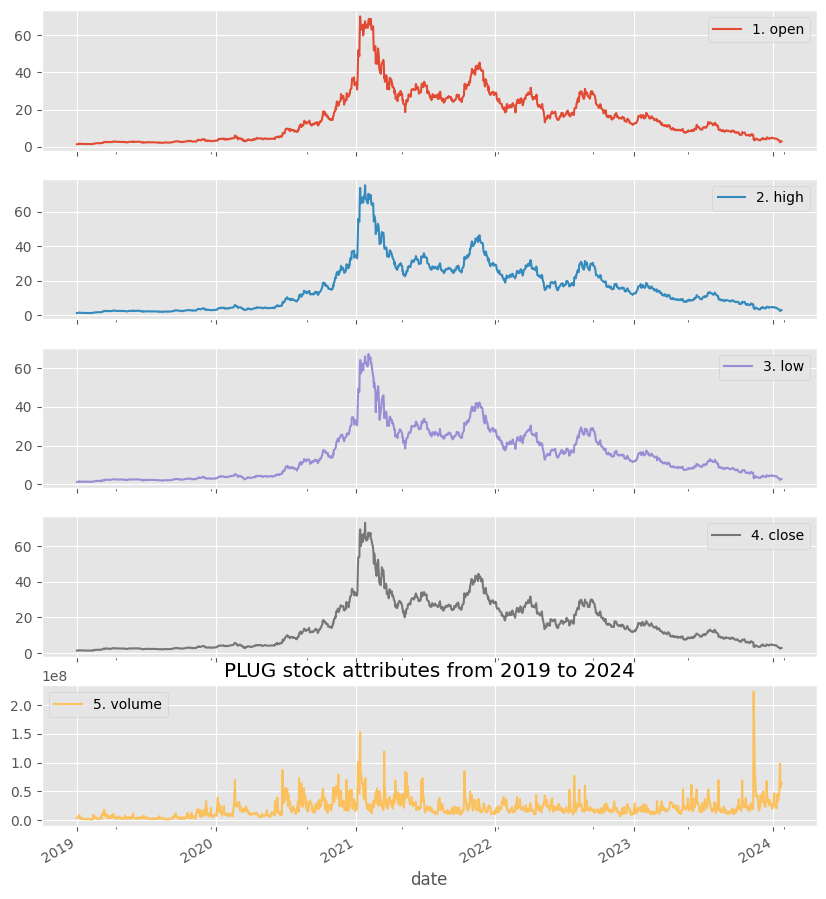

In [161]:
stock_data['PLUG']['2019':'2024'].plot(subplots=True, figsize=(10,12))
plt.title('PLUG stock attributes from 2019 to 2024')
plt.show()

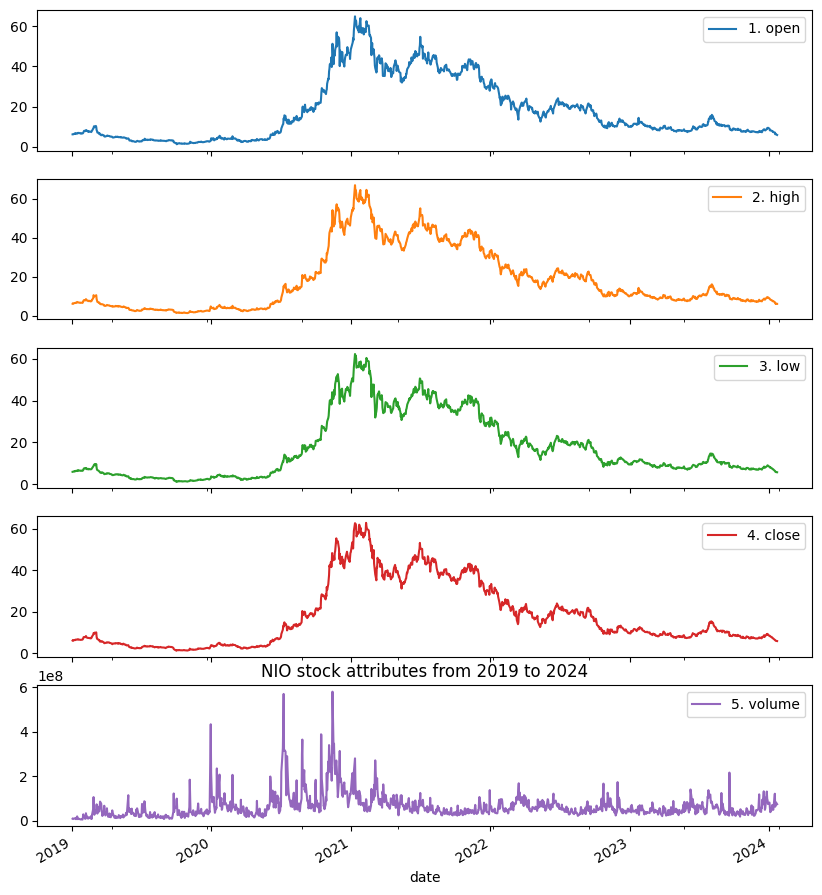

In [105]:
stock_data['NIO']['2019':'2024'].plot(subplots=True, figsize=(10,12))
plt.title('NIO stock attributes from 2019 to 2024')
plt.show()

In [57]:
stock_data['NIO'].corr()

,1. open,2. high,3. low,4. close,5. volume
1. open,1.000000,0.999110,0.998883,0.997833,0.318023
2. high,0.999110,1.000000,0.998696,0.999144,0.334582
3. low,0.998883,0.998696,1.000000,0.998940,0.304088
4. close,0.997833,0.999144,0.998940,1.000000,0.323885
5. volume,0.318023,0.334582,0.304088,0.323885,1.000000


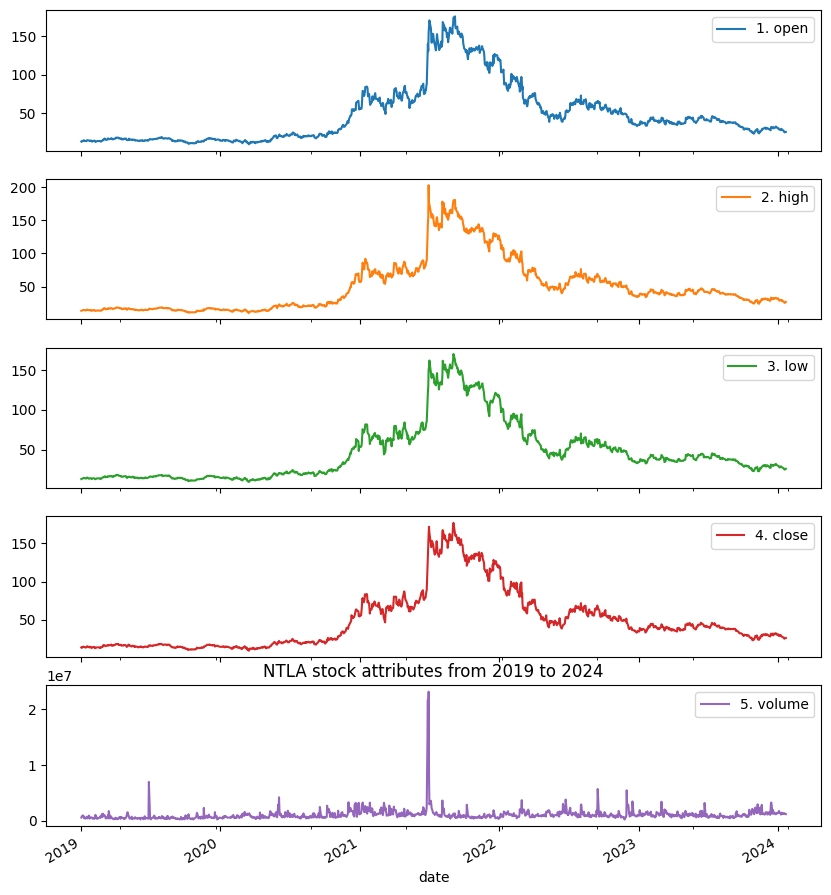

In [104]:
stock_data['NTLA']['2019':'2024'].plot(subplots=True, figsize=(10,12))
plt.title('NTLA stock attributes from 2019 to 2024')
plt.show()

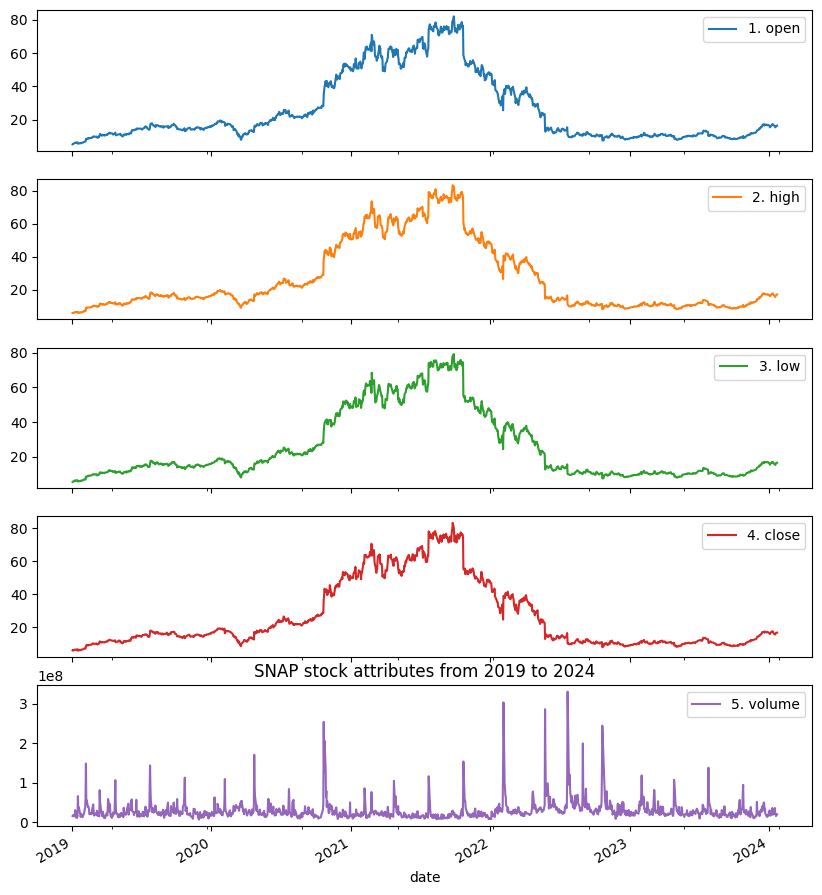

In [103]:
stock_data['SNAP']['2019':'2024'].plot(subplots=True, figsize=(10,12))
plt.title('SNAP stock attributes from 2019 to 2024')
plt.show()

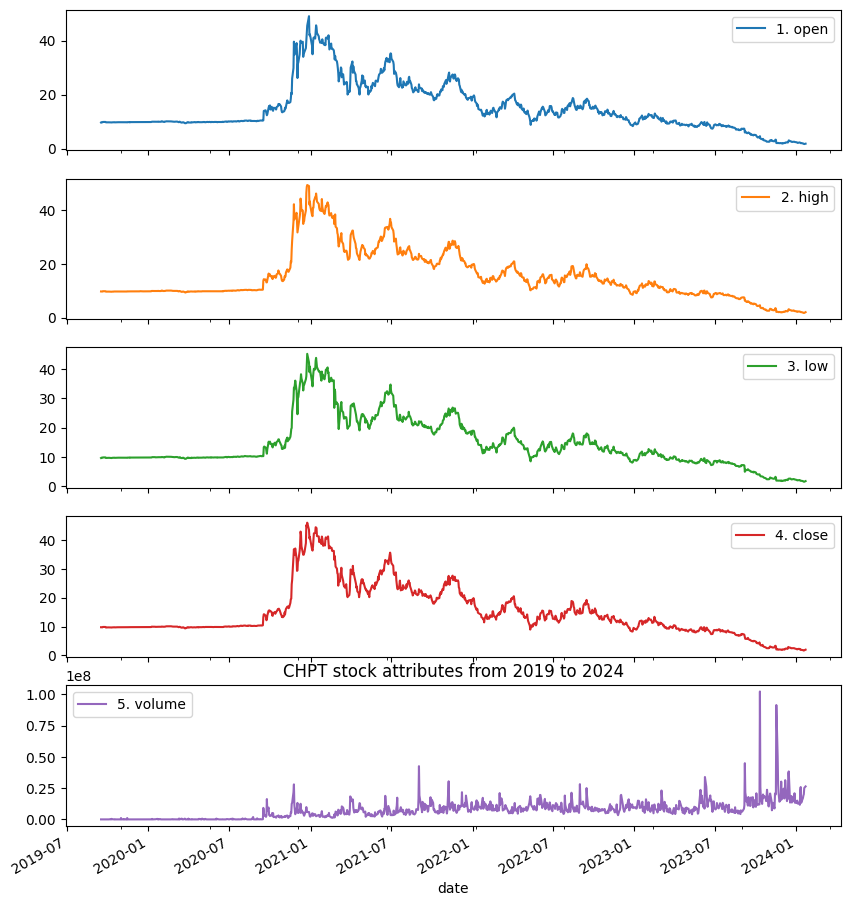

In [102]:
stock_data['CHPT']['2019':'2024'].plot(subplots=True, figsize=(10,12))
plt.title('CHPT stock attributes from 2019 to 2024')
plt.show()

## Plotting our data together prior normalization

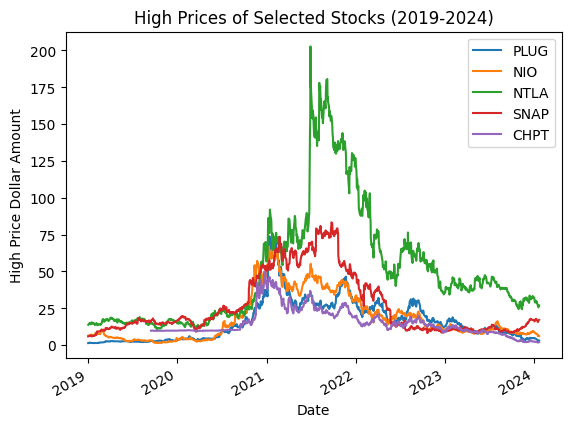

In [108]:
# Plotting before normalization
# symbols_list = ['PLUG', 'NIO', 'NTLA', 'SNAP', 'CHPT']


stock_data['PLUG']['2019':'2024']['2. high'].plot()
stock_data['NIO']['2019':'2024']['2. high'].plot()
stock_data['NTLA']['2019':'2024']['2. high'].plot()
stock_data['SNAP']['2019':'2024']['2. high'].plot()
stock_data['CHPT']['2019':'2024']['2. high'].plot()


# Adding labels and title
plt.title('High Prices of Selected Stocks (2019-2024)')  # Title of the graph
plt.xlabel('Date')  # X-axis label
plt.ylabel('High Price Dollar Amount')  # Y-axis label

# Adding a legend
plt.legend(['PLUG', 'NIO', 'NTLA', 'SNAP', 'CHPT'])

# Display the plot
plt.show()


## Normalization of Stock Data

In the analysis, we implement a normalization technique known as **Indexing to a Base Value**. This method allows us to compare the performance of different stocks over a common timescale and relative scale. By doing so, we can visualize and compare the relative returns of each stock as if they all started from the same point. Here's how the normalization is applied:

- We begin by selecting the daily high prices for each stock within the 2019 to 2024 period.
- Each daily high price is then divided by the first recorded high price of the respective stock at the beginning of 2019 (`iloc[0]`).
- The resulting ratio is multiplied by 100, effectively setting the base value to 100 for each stock.

This approach allows each stock's price series to start at a value of 100, and subsequent prices are adjusted to reflect the percentage change from this initial value. The resulting normalized series is plotted to show the growth trajectory of each stock relative to its starting point, making it straightforward to compare their performances over time.

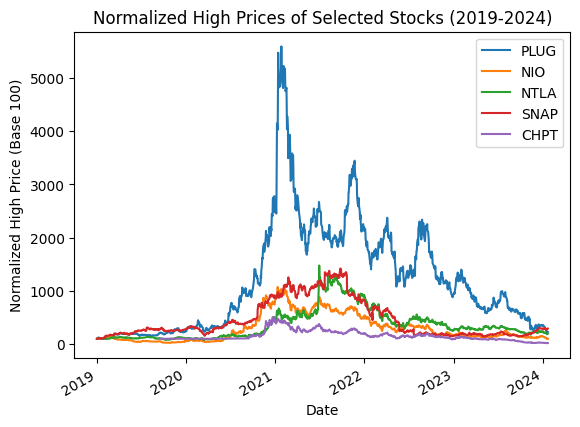

In [109]:
# Normalizing and comparison
# Stocks start from 100

normalized_PLUG = stock_data['PLUG']['2019':'2024']['2. high'].div(stock_data['PLUG']['2019':'2024']['2. high'].iloc[0]).mul(100)
normalized_NIO = stock_data['NIO']['2019':'2024']['2. high'].div(stock_data['NIO']['2019':'2024']['2. high'].iloc[0]).mul(100)
normalized_NTLA = stock_data['NTLA']['2019':'2024']['2. high'].div(stock_data['NTLA']['2019':'2024']['2. high'].iloc[0]).mul(100)
normalized_SNAP = stock_data['SNAP']['2019':'2024']['2. high'].div(stock_data['SNAP']['2019':'2024']['2. high'].iloc[0]).mul(100)
normalized_CHPT = stock_data['CHPT']['2019':'2024']['2. high'].div(stock_data['CHPT']['2019':'2024']['2. high'].iloc[0]).mul(100)

normalized_PLUG.plot()
normalized_NIO.plot()
normalized_NTLA.plot()
normalized_SNAP.plot()
normalized_CHPT.plot()

# Adding labels and title
plt.title('Normalized High Prices of Selected Stocks (2019-2024)')  # Title of the graph
plt.xlabel('Date')  # X-axis label
plt.ylabel('Normalized High Price (Base 100)')  # Y-axis label

# Adding a legend
plt.legend(['PLUG', 'NIO', 'NTLA', 'SNAP', 'CHPT'])

# Display the plot
plt.show()

## Value of Expanding Window Functions in Stock Analysis

The utilization of expanding window functions in the analysis of our stock data provides several benefits that are crucial for financial analysis and trading strategies:

### Trend Identification
- The **expanding mean** offers a visualization of the long-term trend, smoothing out short-term fluctuations to highlight the underlying direction of the stock's movement.

### Volatility Analysis
- The **expanding standard deviation** is indicative of the stock's volatility. An increasing trend suggests rising volatility, while a stable or decreasing trend points to reduced volatility.

### Benchmarking
- Serving as a benchmark, the expanding mean allows analysts to gauge whether the stock is performing above or below its historical average.

### Support and Resistance Levels
- Traders may consider the expanding mean as a dynamic support or resistance level, with the expectation that prices may revert to this mean over time.

### Risk Management
- Volatility analysis is integral to risk management. The expanding standard deviation can inform the setting of stop-loss orders and position sizing to align with an investor's risk tolerance.

### Investment Decisions
- Investors looking for long-term stability and growth can use the expanding mean to assess whether a stock fits their investment profile.

### Valuation Models
- Historical volatility is a key input in valuation models, such as options pricing, where the expanding standard deviation can provide the necessary data.

### Anomaly Detection
- Sudden and significant deviations from the expanding mean or standard deviation can signal anomalies that may require further investigation.

### Market Comparisons
- By normalizing stock data, these expanding metrics can be used to compare different stocks or to benchmark a stock against a market index, providing insights into relative performance.

Incorporating these metrics into stock analysis offers a dynamic and in-depth understanding of a stock's historical performance, informing a wide range of investment and trading decisions.


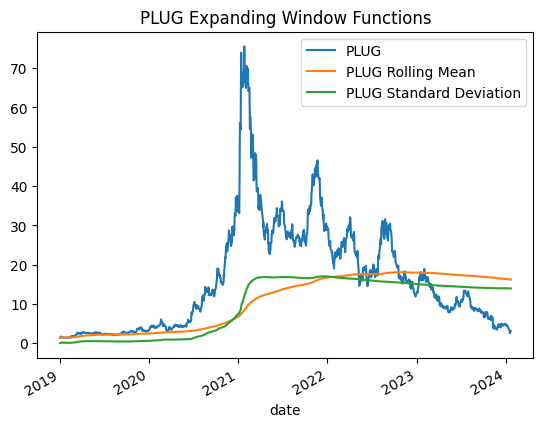

In [110]:
# Expanding Window Functions PLUG

PLUG_expanding_mean = stock_data['PLUG']['2019':'2024']['2. high'].expanding().mean()
PLUG_std = stock_data['PLUG']['2019':'2024']['2. high'].expanding().std()
stock_data['PLUG']['2019':'2024']['2. high'].plot()
PLUG_expanding_mean.plot()
PLUG_std.plot()
plt.title('PLUG Expanding Window Functions')
plt.legend(['PLUG', 'PLUG Rolling Mean', 'PLUG Standard Deviation'])
plt.show()

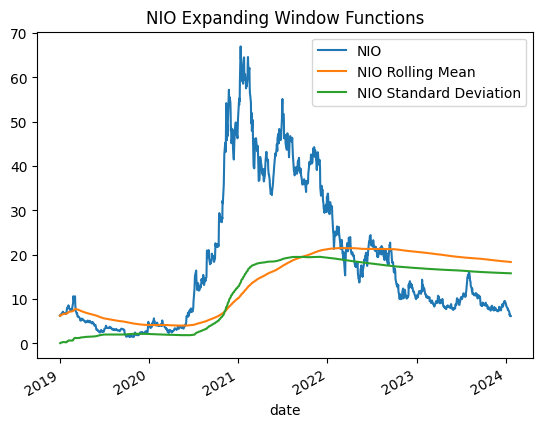

In [111]:
# Expanding Window Functions NIO

NIO_expanding_mean = stock_data['NIO']['2019':'2024']['2. high'].expanding().mean()
NIO_std = stock_data['NIO']['2019':'2024']['2. high'].expanding().std()
stock_data['NIO']['2019':'2024']['2. high'].plot()
NIO_expanding_mean.plot()
NIO_std.plot()
plt.title('NIO Expanding Window Functions')
plt.legend(['NIO', 'NIO Rolling Mean', 'NIO Standard Deviation'])
plt.show()

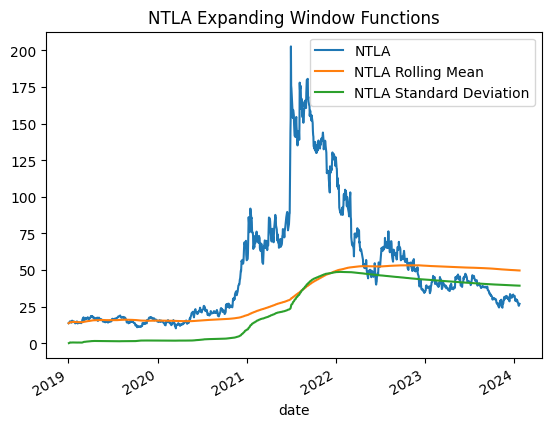

In [112]:
# Expanding Window Functions NTLA

NTLA_expanding_mean = stock_data['NTLA']['2019':'2024']['2. high'].expanding().mean()
NTLA_std = stock_data['NTLA']['2019':'2024']['2. high'].expanding().std()
stock_data['NTLA']['2019':'2024']['2. high'].plot()
NTLA_expanding_mean.plot()
NTLA_std.plot()
plt.title('NTLA Expanding Window Functions')
plt.legend(['NTLA', 'NTLA Rolling Mean', 'NTLA Standard Deviation'])
plt.show()

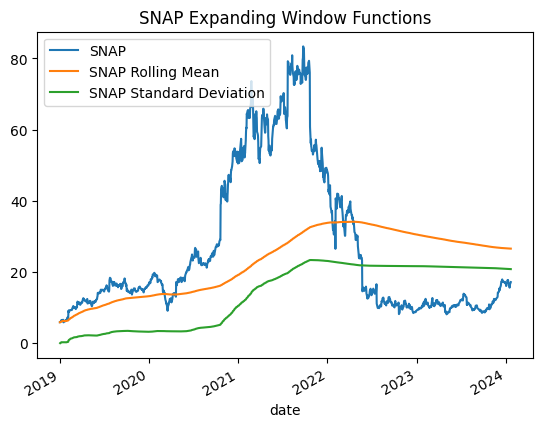

In [113]:
# Expanding Window Functions SNAP

SNAP_expanding_mean = stock_data['SNAP']['2019':'2024']['2. high'].expanding().mean()
SNAP_std = stock_data['SNAP']['2019':'2024']['2. high'].expanding().std()
stock_data['SNAP']['2019':'2024']['2. high'].plot()
SNAP_expanding_mean.plot()
SNAP_std.plot()
plt.title('SNAP Expanding Window Functions')
plt.legend(['SNAP', 'SNAP Rolling Mean', 'SNAP Standard Deviation'])
plt.show()

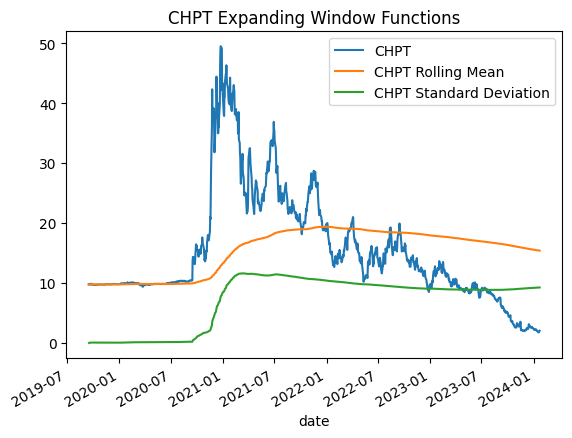

In [114]:
# Expanding Window Functions CHPT

CHPT_expanding_mean = stock_data['CHPT']['2019':'2024']['2. high'].expanding().mean()
CHPT_std = stock_data['CHPT']['2019':'2024']['2. high'].expanding().std()
stock_data['CHPT']['2019':'2024']['2. high'].plot()
CHPT_expanding_mean.plot()
CHPT_std.plot()
plt.title('CHPT Expanding Window Functions')
plt.legend(['CHPT', 'CHPT Rolling Mean', 'CHPT Standard Deviation'])
plt.show()

## Value of Rolling Window Functions in Stock Analysis

Applying rolling window functions to our stocks, like the rolling mean or moving average, to stock data over a specific period, such as 50 days, offers valuable insights for financial analysis and trading strategies:

### Trend Identification
- The **50-day rolling mean** smooths out daily price fluctuations, providing a clearer view of the short-term trend direction without the noise of daily volatility.

### Momentum Indication
- The rolling mean can serve as a momentum indicator. A stock price moving above its 50-day rolling mean may indicate increasing momentum and vice versa.

### Trading Signals
- Crossovers between the stock price and the 50-day rolling mean can be used as trading signals. When the stock price crosses above the rolling mean, it could be a buy signal, while a cross below might suggest a sell signal.

### Support and Resistance Levels
- The 50-day rolling mean may act as a temporary support or resistance level. Prices often bounce off this dynamic line during trends, providing potential entry and exit points.

### Risk Management
- Traders can use the 50-day rolling mean to set trailing stop-loss orders. If the price falls below this level, it could trigger a sale to prevent further losses.

### Indicator of Sentiment
- The position of the stock price relative to the 50-day rolling mean can indicate market sentiment. Prices consistently above this average may reflect bullish sentiment, while prices below may suggest bearish sentiment.

### Technical Analysis
- The rolling mean is a foundational component of various technical analysis indicators and strategies, such as Bollinger Bands and Moving Average Convergence Divergence (MACD).

### Visualization of Price Stability
- By analyzing how tightly the price follows the rolling mean, investors can get a sense of the stock's stability. A tight tracking suggests a stable stock, while wide divergence may indicate instability.

### Comparison with Other Time Frames
- Comparing the 50-day rolling mean with longer time frames, like a 50-day or 200-day moving average, can provide additional context on different market phases (short-term vs. long-term trends).

Implementing the 50-day rolling mean in stock analysis is a powerful method to decipher the market's movements, offering a dynamic view that is more responsive to recent price changes, thus informing a broad array of trading and investment decisions.


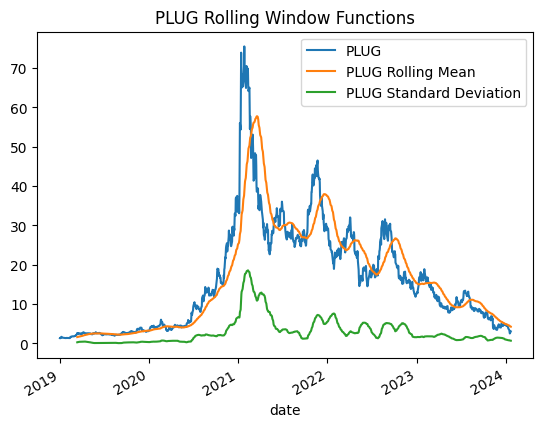

In [124]:
# Rolling Window (50 day) Functions PLUG

PLUG_rolling_mean = stock_data['PLUG']['2019':'2024']['2. high'].rolling(50).mean()
PLUG_rolling_std = stock_data['PLUG']['2019':'2024']['2. high'].rolling(50).std()
stock_data['PLUG']['2019':'2024']['2. high'].plot()
PLUG_rolling_mean.plot()
PLUG_rolling_std.plot()
plt.title('PLUG Rolling Window Functions')
plt.legend(['PLUG', 'PLUG Rolling Mean', 'PLUG Standard Deviation'])
plt.show()

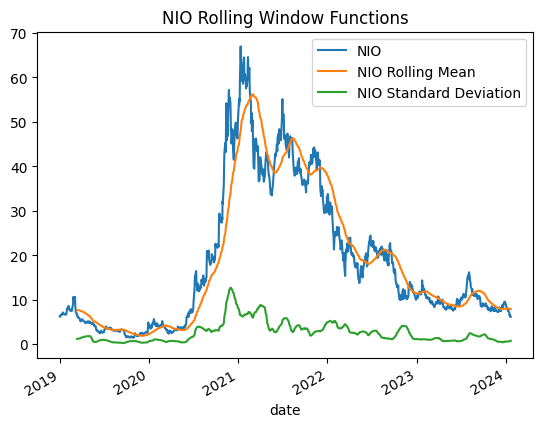

In [125]:
# Rolling Window (50 day) Functions NIO

NIO_rolling_mean = stock_data['NIO']['2019':'2024']['2. high'].rolling(50).mean()
NIO_rolling_std = stock_data['NIO']['2019':'2024']['2. high'].rolling(50).std()
stock_data['NIO']['2019':'2024']['2. high'].plot()
NIO_rolling_mean.plot()
NIO_rolling_std.plot()
plt.title('NIO Rolling Window Functions')
plt.legend(['NIO', 'NIO Rolling Mean', 'NIO Standard Deviation'])
plt.show()

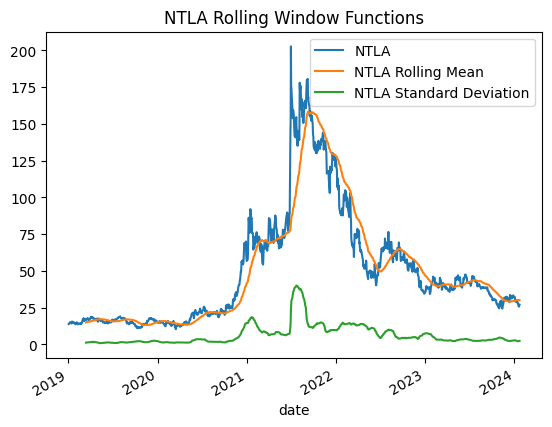

In [126]:
# Rolling Window (50 day) Functions NTLA

NTLA_rolling_mean = stock_data['NTLA']['2019':'2024']['2. high'].rolling(50).mean()
NTLA_rolling_std = stock_data['NTLA']['2019':'2024']['2. high'].rolling(50).std()
stock_data['NTLA']['2019':'2024']['2. high'].plot()
NTLA_rolling_mean.plot()
NTLA_rolling_std.plot()
plt.title('NTLA Rolling Window Functions')
plt.legend(['NTLA', 'NTLA Rolling Mean', 'NTLA Standard Deviation'])
plt.show()

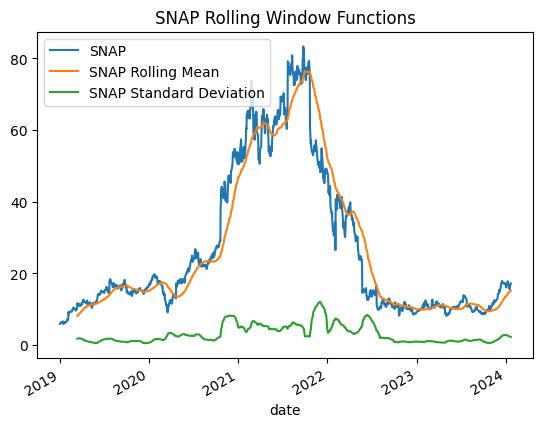

In [127]:
# Rolling Window (50 day) Functions SNAP

SNAP_rolling_mean = stock_data['SNAP']['2019':'2024']['2. high'].rolling(50).mean()
SNAP_rolling_std = stock_data['SNAP']['2019':'2024']['2. high'].rolling(50).std()
stock_data['SNAP']['2019':'2024']['2. high'].plot()
SNAP_rolling_mean.plot()
SNAP_rolling_std.plot()
plt.title('SNAP Rolling Window Functions')
plt.legend(['SNAP', 'SNAP Rolling Mean', 'SNAP Standard Deviation'])
plt.show()


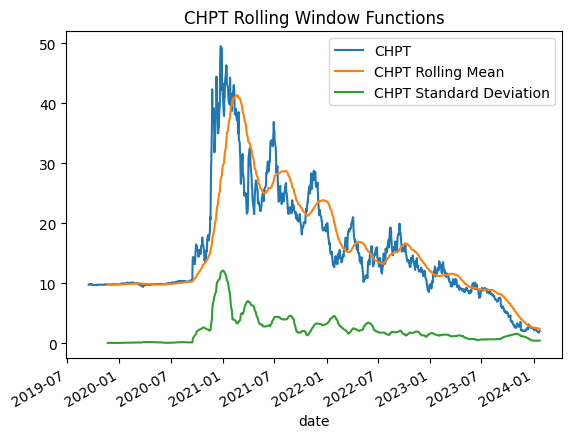

In [128]:
# Rolling Window (50 day) Functions CHPT

CHPT_rolling_mean = stock_data['CHPT']['2019':'2024']['2. high'].rolling(50).mean()
CHPT_rolling_std = stock_data['CHPT']['2019':'2024']['2. high'].rolling(50).std()
stock_data['CHPT']['2019':'2024']['2. high'].plot()
CHPT_rolling_mean.plot()
CHPT_rolling_std.plot()
plt.title('CHPT Rolling Window Functions')
plt.legend(['CHPT', 'CHPT Rolling Mean', 'CHPT Standard Deviation'])
plt.show()

In [129]:
from pylab import rcParams
import statsmodels.api as sm

## Trend and Seasonality

## Decomposition Analysis of PLUG Stock Data

The code snippets below performs a time series decomposition on the 'high' prices of all our stocks from 2019 to 2024. This analysis is essential to understand underlying patterns in the stock price movements. Here's a breakdown of the decomposition and the insights we can gather:

### Code Explanation
- `rcParams['figure.figsize'] = 11, 9`: Sets the size of the plot to 11 inches wide and 9 inches tall for better visibility.
- `decomposed_PLUG = sm.tsa.seasonal_decompose(stock_data['PLUG']['2019':'2024']['2. high'], period=252)`: This line of code utilizes the `seasonal_decompose` function from the `statsmodels` library to decompose the PLUG stock's high prices into three components:
  - Trend
  - Seasonality
  - Residual
  The decomposition uses a period of 252 days, corresponding to the approximate number of trading days in a year, suggesting an annual cycle analysis.
- `figure = decomposed_PLUG.plot()`: Generates a plot of the decomposed time series.
- `plt.show()`: Displays the plot with the decomposed components.

### Insights from the Decomposition

1. **Trend Component**:
   - The trend line smooths out short-term fluctuations and shows the long-term direction of the stock's high prices. An upward trend may indicate a general increase in stock prices over the years, while a downward trend suggests a decline.

2. **Seasonal Component**:
   - This part of the decomposition reveals any regular patterns that repeat annually. For instance, specific times of the year might consistently show higher or lower stock prices, which could be linked to the company's business cycle, market sentiment, or external economic factors.

3. **Residual Component**:
   - The residuals represent the random variations in the stock price that cannot be explained by the trend or seasonality. Analyzing these residuals can help identify unusual events or anomalies that might require further investigation.

By performing this decomposition, we can gain a deeper understanding of the PLUG stock's behavior over time, separating systematic seasonal patterns and long-term trends from random, irregular movements. This information is crucial for investors and analysts in making informed decisions about future investments and understanding the stock's market dynamics.


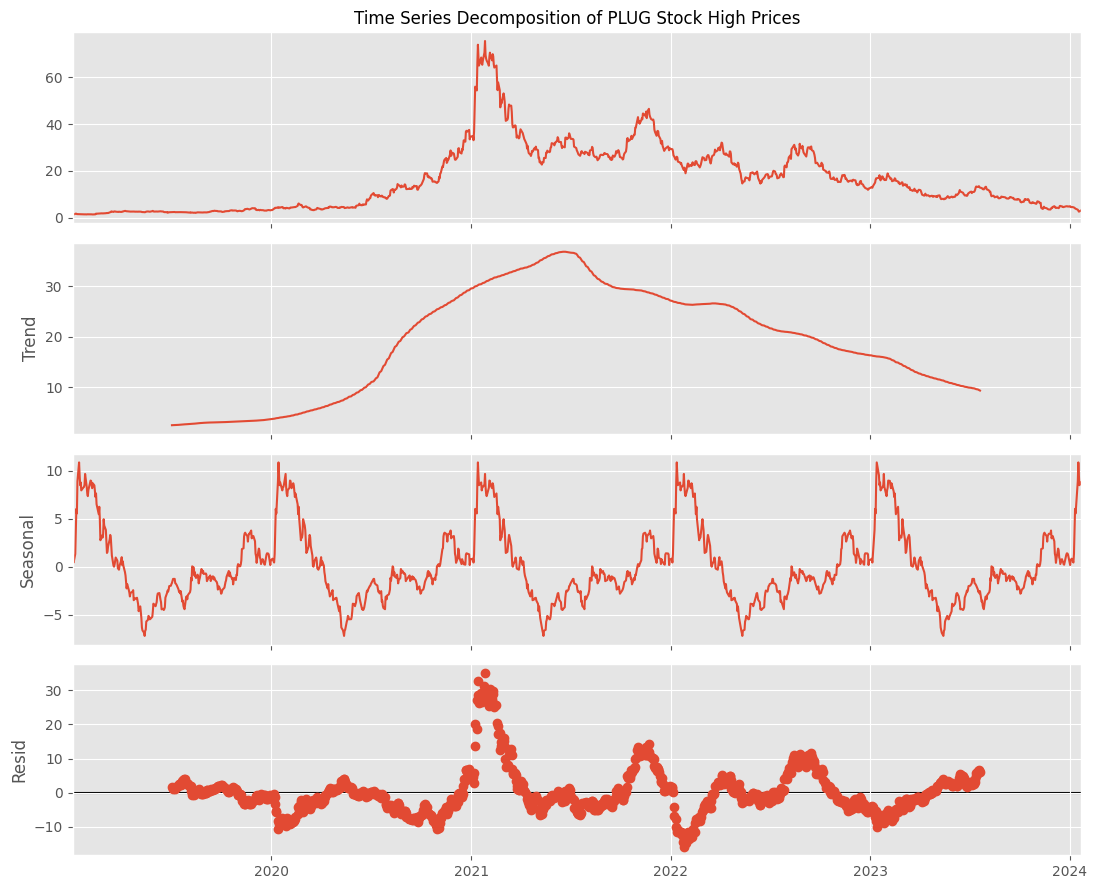

In [177]:
# Decomposition of PLUG

rcParams['figure.figsize'] = 11, 9
decomposed_PLUG = sm.tsa.seasonal_decompose(stock_data['PLUG']['2019':'2024']['2. high'], period=252)
figure = decomposed_PLUG.plot()

axes = figure.axes
axes[0].set_title('Time Series Decomposition of PLUG Stock High Prices', fontsize=12)

plt.show()

## Time Series Decomposition of PLUG Stock High Prices

The attached figure represents the result of a time series decomposition of PLUG stock's high prices from 2019 to 2024. The decomposition separates the data into trend, seasonal, and residual components.

### Observed Data
- The initial plot represents the original observed data, showing significant volatility and a notable peak in early 2021. Following the peak, there's a visible decline, indicating a period of price correction or market adjustment.

### Trend Component
- The trend plot illustrates the long-term progression of the stock's high prices. There's an upward movement culminating in early 2021, signaling a period of growth, after which a downward trend is evident, suggesting a shift in the stock's momentum.

### Seasonal Component
- The seasonal component exhibits the cyclical patterns within the data, repeated over fixed intervals. The consistent amplitude of these cycles points to a stable seasonal influence over the observed time frame.

### Residual Component
- The residuals reflect the irregularities or noise after accounting for trend and seasonality. Around early 2021, the increased variability in residuals could indicate external factors or atypical events influencing stock prices that are not explained by seasonality or trend.

By analyzing these components, we can infer that the stock experienced growth leading up to 2021, followed by a downward adjustment. The seasonal fluctuations could be linked to regular market patterns or company-specific events, while the residuals may highlight anomalies or non-recurring events impacting the stock's performance.

This decomposition is instrumental in understanding the underlying behaviors of the stock's high prices, assisting investors and analysts in making data-driven decisions that account for trend, seasonality, and irregular occurrences in the market.


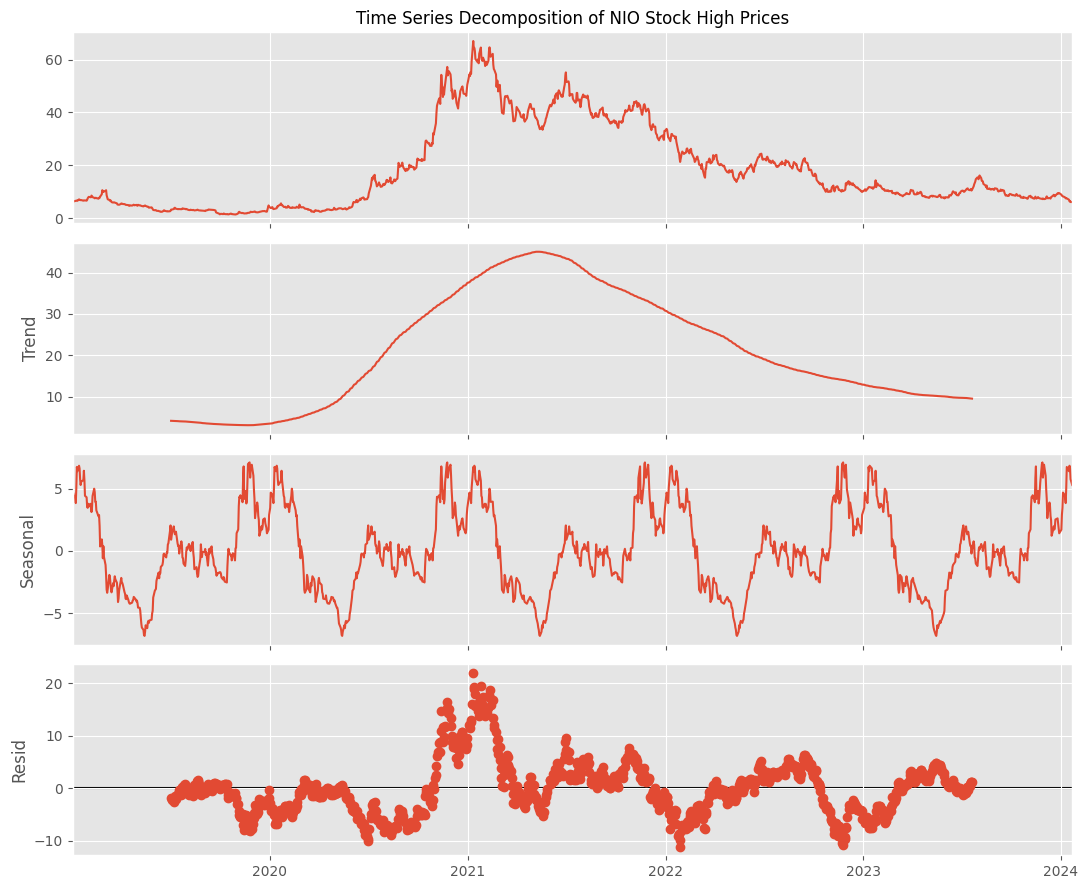

In [178]:
# Decompostion of NIO 

rcParams['figure.figsize'] = 11, 9
decomposed_NIO = sm.tsa.seasonal_decompose(stock_data['NIO']['2019':'2024']['2. high'], period=252)
figure = decomposed_NIO.plot()

axes = figure.axes
axes[0].set_title('Time Series Decomposition of NIO Stock High Prices', fontsize=12)

plt.show()

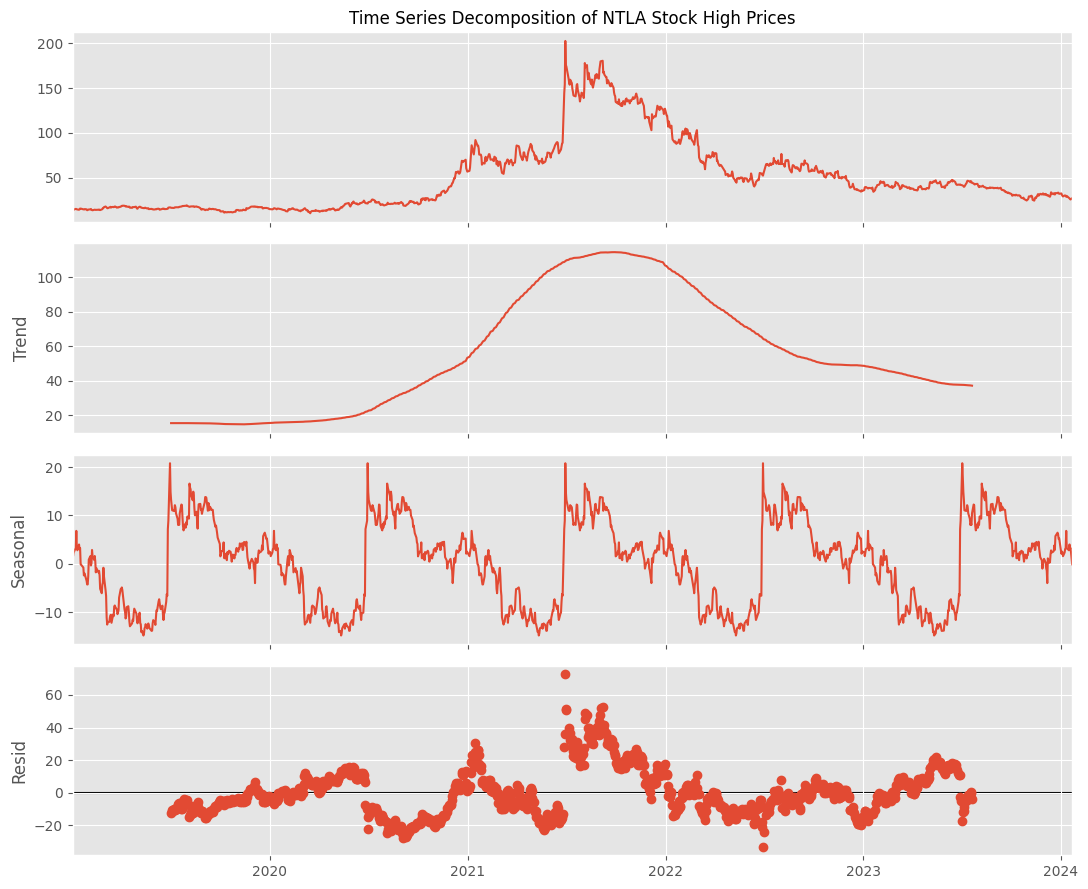

In [179]:
# Decompostion of NTLA

rcParams['figure.figsize'] = 11, 9
decomposed_NTLA = sm.tsa.seasonal_decompose(stock_data['NTLA']['2019':'2024']['2. high'], period=252)
figure = decomposed_NTLA.plot()

axes = figure.axes
axes[0].set_title('Time Series Decomposition of NTLA Stock High Prices', fontsize=12)

plt.show()

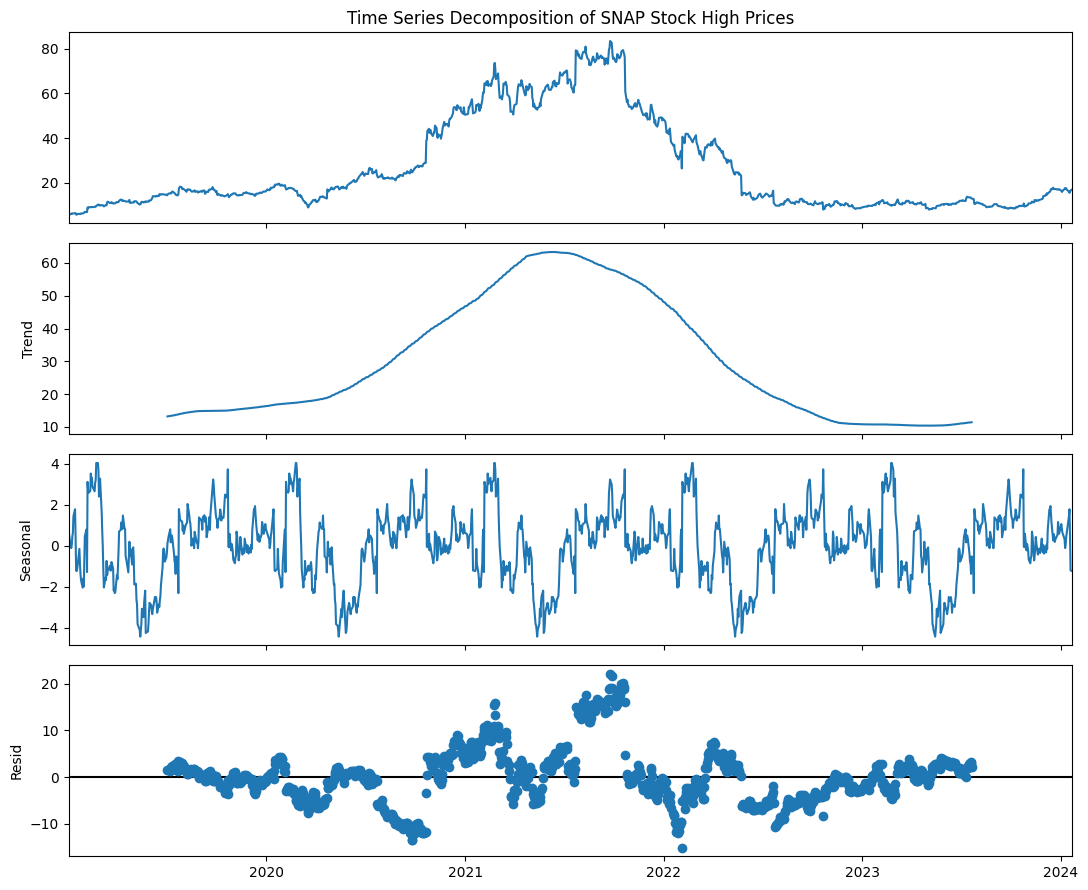

In [156]:
# Decompostion of SNAP

rcParams['figure.figsize'] = 11, 9
decomposed_SNAP = sm.tsa.seasonal_decompose(stock_data['SNAP']['2019':'2024']['2. high'], period=252)
figure = decomposed_SNAP.plot()

axes = figure.axes
axes[0].set_title('Time Series Decomposition of SNAP Stock High Prices', fontsize=12)


plt.show()

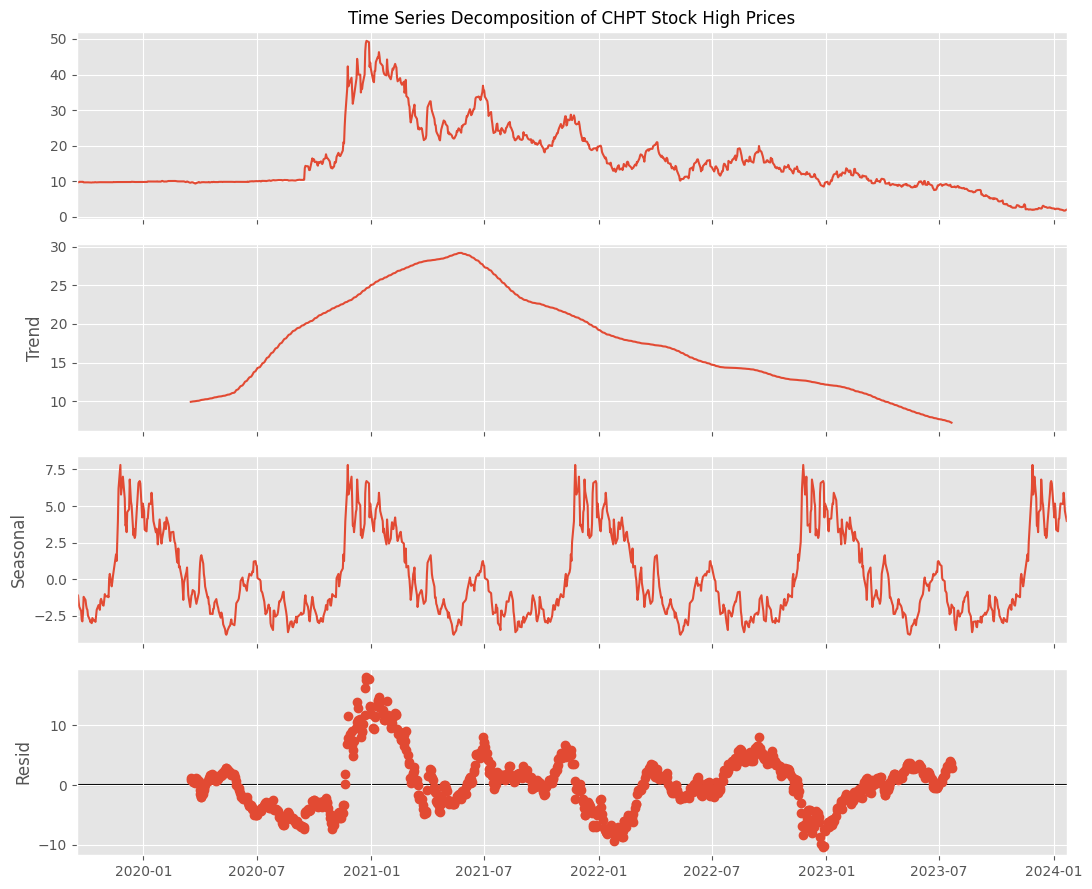

In [180]:
# Decompostion of CHPT

rcParams['figure.figsize'] = 11, 9
decomposed_CHPT = sm.tsa.seasonal_decompose(stock_data['CHPT']['2019':'2024']['2. high'], period=252)
figure = decomposed_CHPT.plot()

axes = figure.axes
axes[0].set_title('Time Series Decomposition of CHPT Stock High Prices', fontsize=12)


plt.show()